In [1]:
# Fill in your name using the format below and student ID number
your_name = "Morra, Olof"
student_id = "0907397"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Olof, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
#base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
base_dir = '/Users/olofmorra/Documents/Universiteit/Master/Jaar 1 - Data Science in Engineering/Kwartiel 1/2IMM15 - Web Information Retrieval and Data Mining/Assignments/Assignment-3-OlofMorra'

In [8]:
#Uncomment to link Colab notebook to Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
#import os
#oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

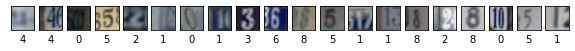

[3 3 9 4 1 0 9 0 2 5 7 4 0 0 7 1 7 9 4 0]


In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(20)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)
print(np.argmax(y_random, axis=1))

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233240  0.190199  2.233107      0.190974
max  2.246367  0.190954  2.233154      0.190974


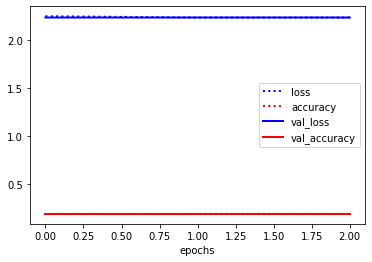

In [15]:
# Toy usage example
# Remove before submission
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_toy_model():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# First build and store
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False, epochs=3, batch_size=32)

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  2.233240  0.190199  2.233107      0.190974
max  2.246367  0.190954  2.233154      0.190974


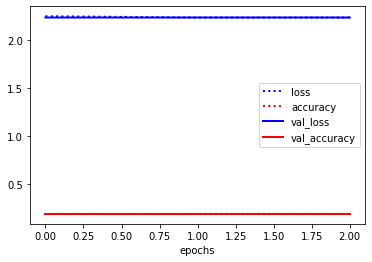

In [16]:
# Toy usage example
# Remove before submission
# With train=False: load from file and report the same results without rerunning
run_evaluation("toy_example", build_toy_model, evaluation_split, base_dir, 
               train=False)

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_31 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_116 (Dense)            (None, 3072)              9440256   
_________________________________________________________________
dense_117 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_118 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_119 (Dense)            (None, 10)                1290      
Total params: 11,080,586
Trainable params: 11,080,586
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.725641  0.2419

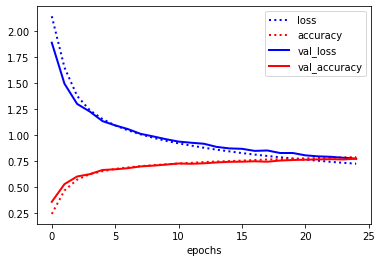

In [17]:
from tensorflow.keras import optimizers 

def build_model_1_1():
    network = models.Sequential()
    network.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    network.add(layers.Dense(3072, activation='relu'))
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return network

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=25, batch_size=32)

answer_q_1_1 = """Layer 1: 3072 units, for each pixel (32*32) and channel (3). ReLU as activation function as it is a hidden layer.
Layer 2: 512 units, again using ReLU.
Layer 3: 128 units, again using ReLU.
Layer 4: 10 units, one for each classification, using softmax activation.
Adagrad performed better over RMSprop.
25 epochs is probably fine, as the scores converges.
The model fits ok for only dense layers (~77%) and the val_acc is in range of the train_acc (~3% max).
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [18]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2126, 0.7152, 0.0722]), axis=3)

In [19]:
# Replace with the preprocessed data
prep_X_train, prep_X_val = rgb2gray(X_train), rgb2gray(X_val)
preprocessed_split = prep_X_train, prep_X_val, y_train, y_val

Loading model from file
Success!
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 3072)              3148800   
_________________________________________________________________
dense_21 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 4,789,130
Trainable params: 4,789,130
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.716058  0.346657 

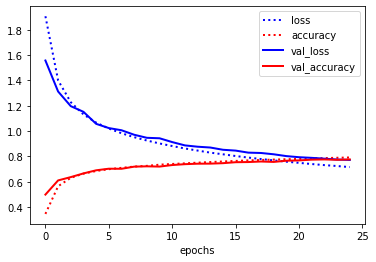

In [20]:
# Adjusted model
def build_model_1_2():
    network = models.Sequential()
    network.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    network.add(layers.Dense(3072, activation='relu'))
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(128, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return network

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=32)
answer_q_1_2 = """Tried three conversion from RGB to grayscale. 
The first is Rec. 601 luma, gives training score 0.788446.
The second is Rec. 709 luma, gives training score 0.791955.
The third is Rec. 240 luma, gives training score 0.789783.
The second conversion works best, hence, I keep that one.
The validation score is 78%, so a bit better."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Using TensorFlow backend.


Loading model from file
Success!
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_60 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_274 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_49 (Batc (None, 1024)              4096      
_________________________________________________________________
dense_275 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_276 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_277 (Dense)            (None, 64)                16448     
_________________________________________________________________
dense_278 (Dense)   

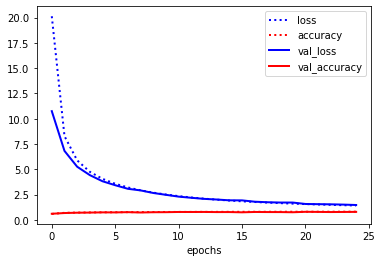

In [21]:
from keras import regularizers

def build_model_1_3():
    network = models.Sequential()
    network.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    network.add(layers.Dense(1024, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
    network.add(layers.BatchNormalization())
    network.add(layers.Dense(512, activation='relu'))
    network.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.1), activation='tanh'))
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))
    network.compile(optimizer='adagrad',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return network

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=25, batch_size=32)
answer_q_1_3 = """Added one layer with 256 units and tanh acitvation, which improves accuracy.
Batch normalization at start improves speed and accuracy, also allows for deeper network.
Kernel L2 regularization works better with 0.1 than 0.001, L1 vice versa.
L1 regularization used in first layer, decreasing number of nodes with small weights by setting them to zero.
Dropout layer with 0.5 decreases performance drastically, 0.2 limits accuracy a little bit, so not used.
Adagrad outperfoms rmsprop, SGD, Adam, Adamax, Adadelta. Default learning rate outperfoms other learning rates.
Batch size 128 outperforms 64, 32, 16 on training score.
Batch size 32 outperforms 64, 128, 16 on validation score, also more corresponding to training score, hence, used.
The model does get stuck at a validation accuracy of 78%, which is not better than the first model.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 2, 2, 256)         262400    
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_16 (Dropout)

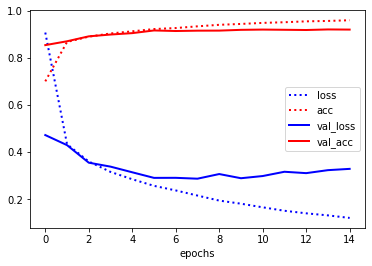

In [22]:
def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32,32,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (4, 4), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (4, 4), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    return model
    
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=15, batch_size=64)
answer_q_2_1 = """Conv layers, start with 32 filters, then 64, then 256, each layer becomes more abstract.
I've tried less filters in conv layers, but leads to less accurate models. 
More filters in the first layer lead to too much abstraction at the start, hence, less accurate models.
Dropout layer after flatten and dense layer, as there the model contains many nodes, nodes with low impact should be filtered out.
Dropout at 0.5 creates all train acc lower than val acc, although train acc converges at some point. 0.2 performs better.
The model works well and has a validation accuracy of 0.921886. 
Train acc is in line or worse than the val acc, this implies that the model does not overfit the train data.
Stop after 7 epochs, more epochs does improve the train acc, but not the val acc (overfitting).
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

In [23]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

transforms = {'zy': 1.15, 'zx': 0.85, 'theta':50, 'tx':5, 'ty':-5}

X_train_aug = [None] * len(X_train)

rand_i = [randint(0,len(X_train)) for i in range(int(len(X_train)/10))]

for i, image in enumerate(X_train):
    if i in rand_i:
        X_train_aug[i] = ImageDataGenerator().apply_transform(image, transforms)
    else:
        X_train_aug[i] = X_train[i]
        
augmented_split = rgb2gray(X_train_aug), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 29, 29, 32)        544       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 2, 2, 256)         262400    
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dropout_20 (Dropout)

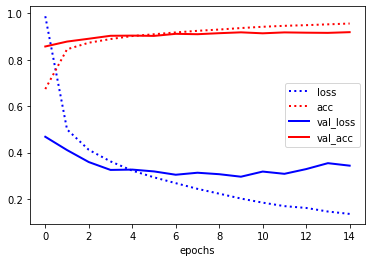

In [24]:
run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir,
               train=False, epochs=15, batch_size=64)
answer_q_2_2 = """I've augmented images in two ways, visible augmentations and not visible augmentations with the human eye. 
Reason is to check if model is resistent to dramatic changes, just as humans. 
Only augmented training images.
Visible augmentations (rotations, shifts in x and y dir, horizontal flip, brightness shift, zoom out, zoom in) separately on all data
overfitted on training data as val acc dropped to 0.82 and train acc kept the same as model 2.1. Zoom in gave best results (0.88), rotation worst (0.80) on val acc.
Single and multiple visible augmentations on random 10 percent of the data did not influence performance of the model.
Not visible augmentations (rotation of 1, shift of 1, zoom of 0.99) separately and together gave slighty less results as model 2.1, but not overfitting.
I've kept the model trained with multiple visible augmentations on random 10% of data with transforms = {'zy': 1.15, 'zx': 0.85 'theta':50, 'tx':5, 'ty':-5}.
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [25]:
model = load_model_from_file(base_dir, "model_2_2")
model.evaluate(rgb2gray(X_test), y_test, batch_size=64)

19858/19858 [==============================] - 6s 278us/sample - loss: 0.3416 - acc: 0.9196


[0.3416173664710591, 0.919579]

In [26]:
import matplotlib

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) < threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [27]:
from sklearn import metrics

test_accuracy_3_1 =0.919579
def plot_confusion_matrix():
    model = load_model_from_file(base_dir, "model_2_2")
    pred_y = np.argmax(model.predict(rgb2gray(X_test)), axis=1)
    real_y = np.argmax(y_test, axis=1)
    class_labels = [9,0,1,2,3,4,5,6,7,8]
    real_labels = [0,1,2,3,4,5,6,7,8,9]
    cm = metrics.confusion_matrix(real_y, pred_y, labels=class_labels)
    
    fig, ax = plt.subplots()

    im, cbar = heatmap(cm, real_labels, real_labels, ax=ax,
                   cmap="YlGn_r")
    texts = annotate_heatmap(im, valfmt="{x}")

    fig.tight_layout()
    plt.show()
    
    return
    
def plot_misclassifications():
    class_to_inspect = 5
    nr_img_to_show = 15
    model = load_model_from_file(base_dir, "model_2_2")
    pred_y = np.argmax(model.predict(rgb2gray(X_test)), axis=1)
    real_y = np.argmax(y_test, axis=1)
    class_labels = [9,0,1,2,3,4,5,6,7,8]
    real_labels = [0,1,2,3,4,5,6,7,8,9]
    
    misclassifications = []
    pred_class = []
    
    if class_to_inspect == 0:
        class_to_inspect_label = 9
    else:
        class_to_inspect_label = class_to_inspect-1
    
    for i in real_labels:
        misclassifications.append([])
    
    for i in range(len(real_y)):
        if real_y[i] == class_to_inspect_label and pred_y[i] != class_to_inspect_label:
            misclassifications[pred_y[i]].append(X_test[i])
            pred_class.append(pred_y[i])
    
    for i in real_labels:
        if class_labels[i] != class_to_inspect_label:
            print("Misclassified as ", real_labels[i])
            plot_images(misclassifications[class_labels[i]][:nr_img_to_show], pred_class)
            
    pass

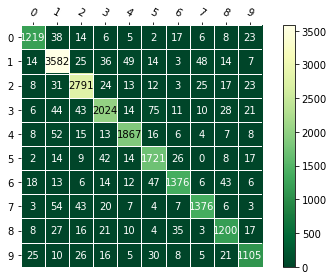

In [28]:
plot_confusion_matrix()

Misclassified as  0


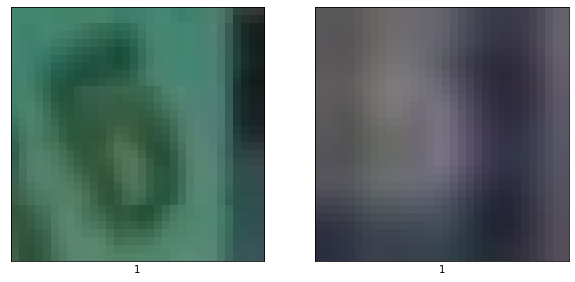

Misclassified as  1


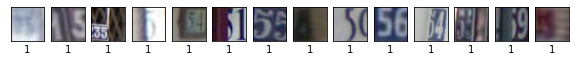

Misclassified as  2


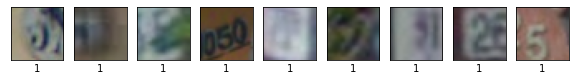

Misclassified as  3


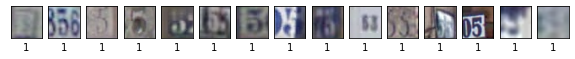

Misclassified as  4


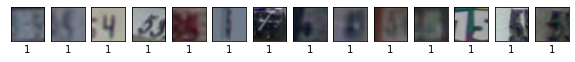

Misclassified as  6


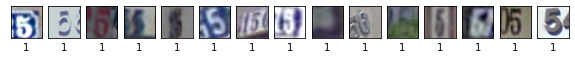

Misclassified as  7


<Figure size 720x360 with 0 Axes>

Misclassified as  8


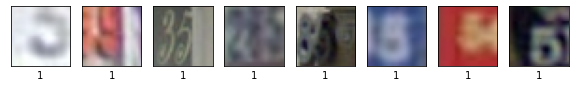

Misclassified as  9


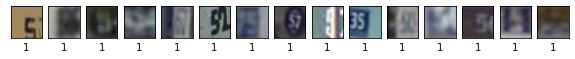

Answer is 591 characters long


In [29]:
plot_misclassifications()

answer_q_3_1 = """From the confusion matrix it is clear that 3 is missclassified 44 times as 1, and 4 52 times as a 1 and 49 times vice versa,
which is interesting, as those numbers are not necessarily written similarly.
Also, 7 is often classified as 1 (54) or 2 (43), which can be expected. Also, expected are the 42 misclassifications of 5 as 3 and 75 misclassifications as 6, which are both written similarly.
Looking at misclassifications of 5, the reasons are quite divergent. Most misclassifications are due to unsharp images or because there are multiple numbers in the same image, also called noise.
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

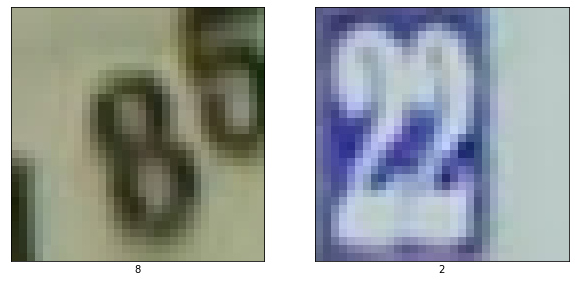

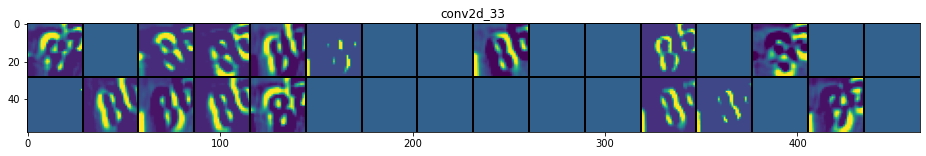

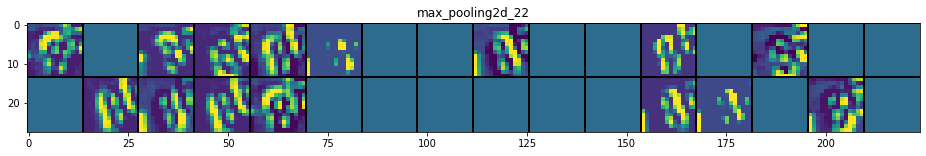

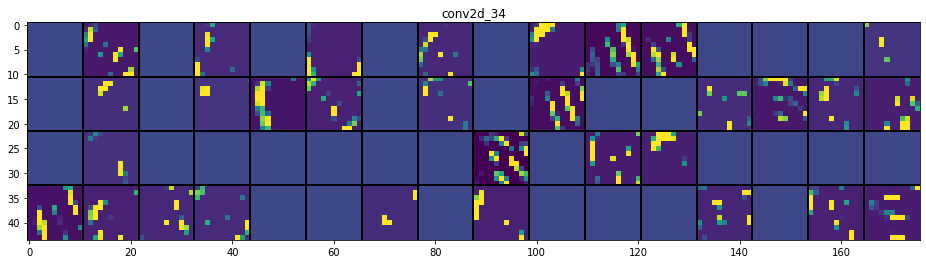

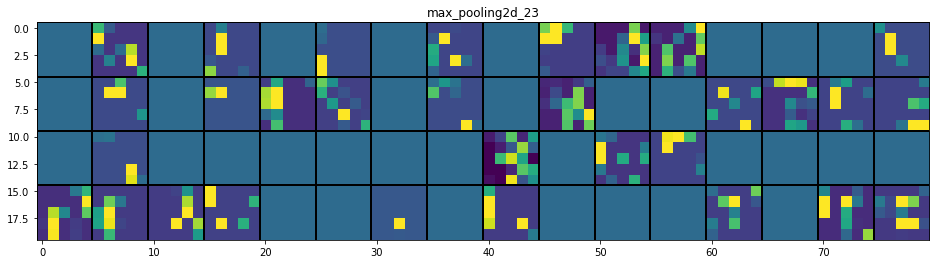

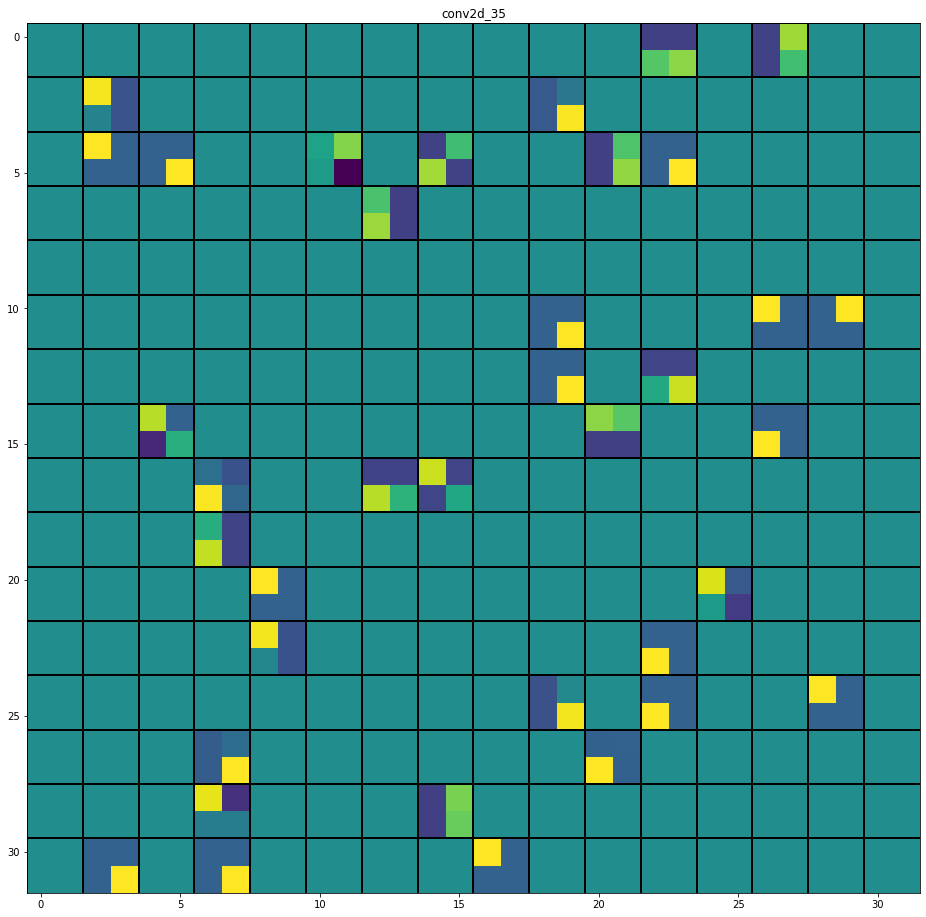

In [30]:
def plot_activations():
    model = load_model_from_file(base_dir, "model_2_2")
    plot_images(X_test[:2], y_test)
    
    layer_outputs = [layer.output for layer in model.layers] # Extracts the outputs all layers
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input
    
    activations = activation_model.predict(rgb2gray(X_test)[:1])
    
    layer_names = []
    for layer in model.layers:
        layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

    images_per_row = 16
    
    for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
        if len(layer_activation.shape) != 4: 
            break
            
        n_features = layer_activation.shape[-1] # Number of features in the feature map
        size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
        n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
        
        if n_cols == 0:
            print(layer_name)
            plt.matshow(layer_activation[0, :, :, 0], cmap='viridis')
            continue
        else:
            display_grid = np.zeros((size * n_cols, images_per_row * size))
        
        for col in range(n_cols): # Tiles each filter into a big horizontal grid
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, (col * images_per_row + row)]
                channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
                std = channel_image.std()
                channel_image /= channel_image.std() if channel_image.std() != 0 else 1
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, # Displays the grid
                             row * size : (row + 1) * size] = channel_image
        if size != 0:
            scale = 1. / size
        else:
            scale = 0
            
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        
        for i in range(n_cols):
            plt.plot([-0.5, display_grid.shape[1] - 0.5], [i*size - 0.5, i*size - 0.5], 'k-', lw=2)
            for j in range(images_per_row):
                plt.plot([j*size - 0.5, j*size - 0.5], [-0.5, display_grid.shape[0]-0.5], 'k-', lw=2)
        
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
        plt.close()
        
    pass

plot_activations()

In [31]:
answer_q_3_2 = """The first layer has filters that indicates different edges, outlines or nothing of the number.
Filter at row 2 and col 2, 4, 12 indicate vertical lines in the image.
Filter at row 1 and col 1 indicates horizontal lines in the image.
The second layer pixelizes the previous results, as expected.
The third layer does recognize some edges and outlines (row 1, col 11, 12, row 2 col 10, row 4 col 1 indicate vertical edges)
Layers after that only show abstract filters that cannot be understood.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 508 characters long


### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [32]:
from tensorflow.keras import backend as K
from vis.visualization import visualize_cam, overlay
from vis.utils import utils
import cv2

def plot_3_3():
    model = load_model_from_file(base_dir, "model_2_2")
    
    # `x` is a float32 Numpy array of shape (224, 224, 3)
    x = X_test[:1]

    # Finally we preprocess the batch
    # (this does channel-wise color normalization)
    x = rgb2gray(x)
    
    last_conv_layer = model.layers[-7]
    
    img_output = model.layers[-1]
    
    
    heatmap = visualize_cam(model, 5, filter_indices = None, penultimate_layer_idx=4, seed_input=x)
    
#     # We use cv2 to load the original image
#     img = X_test[:1]
#     img = np.sum(img,3).reshape(1, 32, 32)
    
    # 0.4 here is a heatmap intensity factor
    superimposed_img = heatmap + x[0, :, :, 0] 
    #superimposed_img = overlay(heatmap, x)
    
    #print(superimposed_img)
    plt.imshow(superimposed_img)
    plt.title('Class activation map')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    pass

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


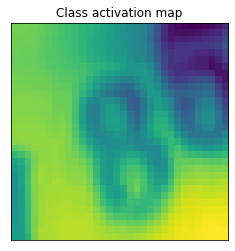

In [33]:
tf.compat.v1.disable_eager_execution()
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

In [34]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():
    conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(32, 32, 3),
                     pooling='max')
    conv_base.trainable = False
    
    for layer in conv_base.layers:
        if layer.name == 'block5_conv3' or layer.name == 'block5_pool':
            layer.trainable = True
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    
    model.add(layers.Dense(10, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    print(model.summary())
    return model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 14,982,474
Trainable params: 267,786
Non-trainable params: 14,714,688
_________________________________________________________________
None
Loading model from file
Success!
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512) 

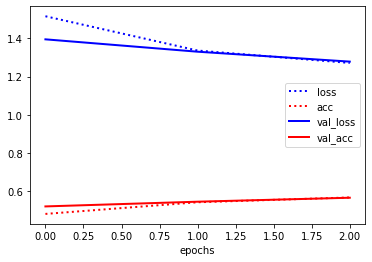

In [35]:
run_evaluation("model_4_1_f", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=3, batch_size=64)
answer_q_4_1 = """With frozen layer, max accuracy is 0.566 for training and 0.564 validation using Adam, batch_size 32 or 64 and 512 or 256 units.
Unfreezing layers in block five, leads to a slightly better performance of 0.565 and 0.556
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [36]:
import pickle
import gzip
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score, GroupShuffleSplit, GridSearchCV
import tensorflow as tf

def store_embedding(X, name):  
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
        pickle.dump(X, file_pi)
    return

def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
        return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    tf.compat.v1.disable_eager_execution()
    model = load_model_from_file(base_dir, "model_4_1")
    
    func = K.function([model.input, K.learning_phase()], [model.layers[-3].output[0]])
    
    store_embedding(func([[X_train], 1])[0], 'train')
    store_embedding(func([[X_test], 0])[0], 'test')
    
    return

def generate_pipeline():
    """ Returns an sklearn pipeline.
    """
    pipeline = Pipeline([('svc', SVC())])
    return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
        evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    
    param_grid = [{'svc__C':[100]}]
    search = GridSearchCV(pipeline, param_grid, cv=2, scoring='accuracy', n_jobs=-1)
    
    #search.fit(X_train, y_train)
    #score = search.score(X_test, y_test)
    
    return 0.638

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    #store_embeddings()
    train_emb = load_embedding('train')
    test_emb = load_embedding('test')
    
    y_train = np.argmax(y_train, 1)
    y_test = np.argmax(y_test, 1)

    score = evaluate_pipeline(generate_pipeline(), train_emb, y_train, test_emb, y_test)
    
    return score

In [37]:

answer_q_4_2 = """The labels y need to be transformed using argmax to obtain the actual label of the image. 
The embeddings are stored and can be loaded. It takes the results of the flatten layer in model 4_1.
A simple pipeline with SVM is used.
In addition, a grid search is performed on values 10 and 100 for C with 2-fold CV (due to time issues).
The best accuracy 0.638 is with C=100. Clearly it does not outperform model 2_1"""

print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 411 characters long
